In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
columns = [
    "Area",
    "Perimeter",
    "Compactness",
    "Kernel_Length",
    "Kernel_Width",
    "Asymmetry_Coefficient",
    "Kernel_Groove_Length",
    "Class_Label"
]
df = pd.read_csv('../data/seeds_dataset.txt', delim_whitespace=True, header=None, names=columns)
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_12772\2173467673.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('../data/seeds_dataset.txt', delim_whitespace=True, header=None, names=columns)


,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coefficient,Kernel_Groove_Length,Class_Label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   210 non-null    float64
 1   Perimeter              210 non-null    float64
 2   Compactness            210 non-null    float64
 3   Kernel_Length          210 non-null    float64
 4   Kernel_Width           210 non-null    float64
 5   Asymmetry_Coefficient  210 non-null    float64
 6   Kernel_Groove_Length   210 non-null    float64
 7   Class_Label            210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [6]:
df.describe()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coefficient,Kernel_Groove_Length,Class_Label
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [9]:
# Select Feature

X = df.drop('Class_Label', axis=1)

In [10]:
# Scale Feature

sc = StandardScaler()
x_scale = sc.fit_transform(X)

### KMeans

Text(0, 0.5, 'Silhouette Score')

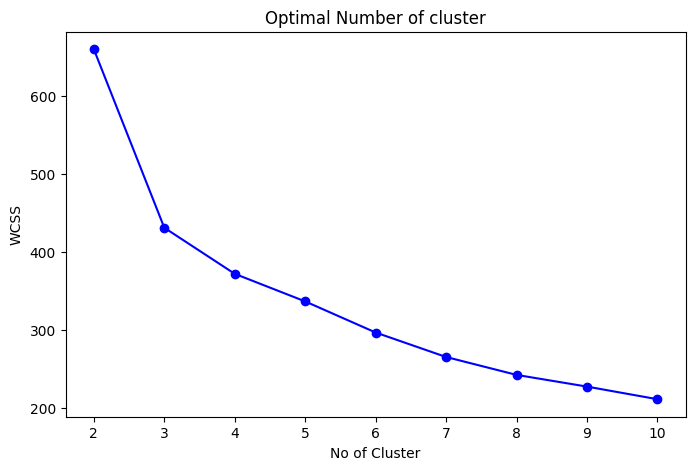

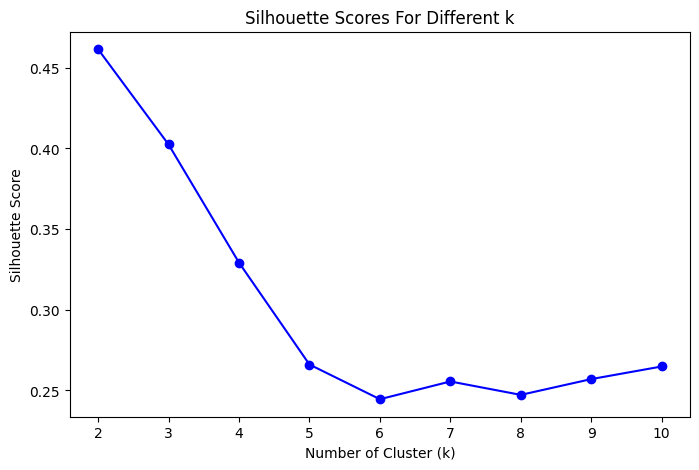

In [21]:
# Find optimal number of cluster using wcss
wcss = []
sil_score = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    label = kmeans.fit_predict(x_scale)
    wcss.append(kmeans.inertia_)
    sil_score.append(silhouette_score(x_scale, label))

plt.figure(figsize=(8,5))
plt.plot(range(2,11), wcss, 'bo-')
plt.title('Optimal Number of cluster')
plt.xlabel('No of Cluster')
plt.ylabel('WCSS')

plt.figure(figsize=(8,5))
plt.plot(range(2,11), sil_score, 'bo-')
plt.title('Silhouette Scores For Different k')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('Silhouette Score')

In [22]:
# Kmeans
optimal = 2
kmeans = KMeans(n_clusters=optimal, random_state=42)
kmeans_label = kmeans.fit_predict(x_scale)

In [23]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scale)

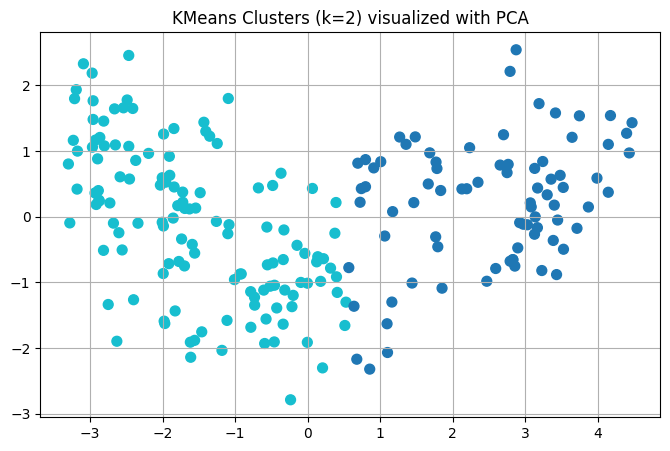

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(x_pca[:,0], x_pca[:, 1], c=kmeans_label, cmap='tab10', s=50)
plt.title("KMeans Clusters (k=2) visualized with PCA")
plt.grid(True)
plt.show()

### Mean Shift

In [28]:
optimal_bandwidth = estimate_bandwidth(x_scale, quantile=0.2, n_samples=300)

mean_shift = MeanShift(bandwidth=optimal_bandwidth)
meanshift_label = mean_shift.fit_predict(x_scale)
k_meanshift = len(np.unique(meanshift_label))
k_meanshift

2

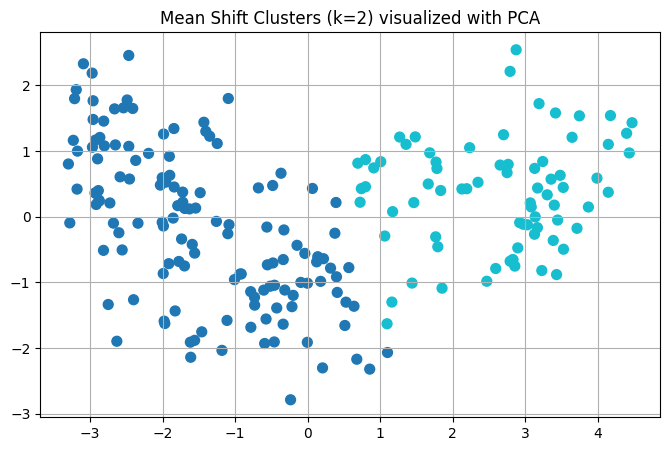

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=meanshift_label, s=50, cmap='tab10')
plt.title("Mean Shift Clusters (k=2) visualized with PCA")
plt.grid(True)
plt.show()

### Agglomerative Clustering

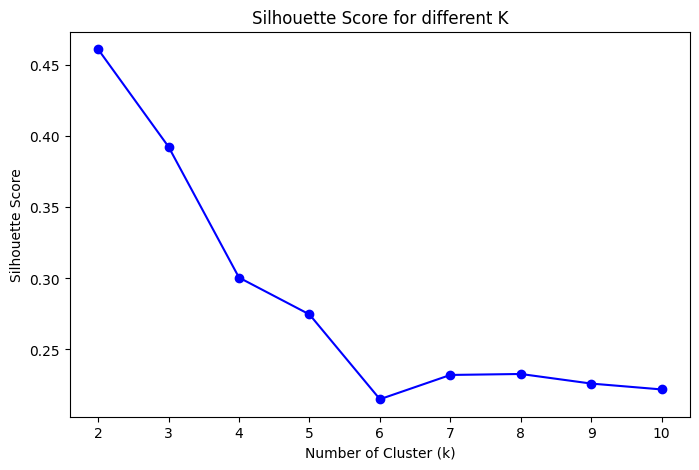

In [31]:
# Find optimal K value for Agglomerative Clustering
sil_score_agglo = []

for i in range(2,11):
    agglo = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward')
    agglo_label = agglo.fit_predict(x_scale)
    sil_score_agglo.append(silhouette_score(x_scale, agglo_label))
    
plt.figure(figsize=(8,5))
plt.plot(range(2,11), sil_score_agglo, 'bo-')
plt.title('Silhouette Score for different K')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('Silhouette Score')
plt.show()

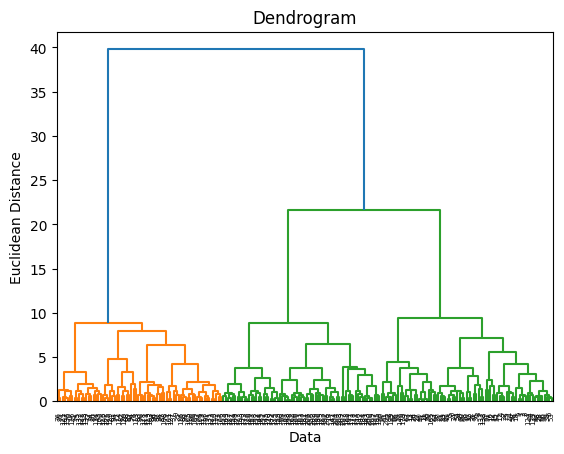

In [33]:
dedrogram = dendrogram(linkage(x_scale, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data')
plt.ylabel('Euclidean Distance')
plt.show()

In [34]:
optimal_agglo = 2
agglo = AgglomerativeClustering(n_clusters=optimal_agglo, metric='euclidean', linkage='ward')
agglo_label = agglo.fit_predict(x_scale)

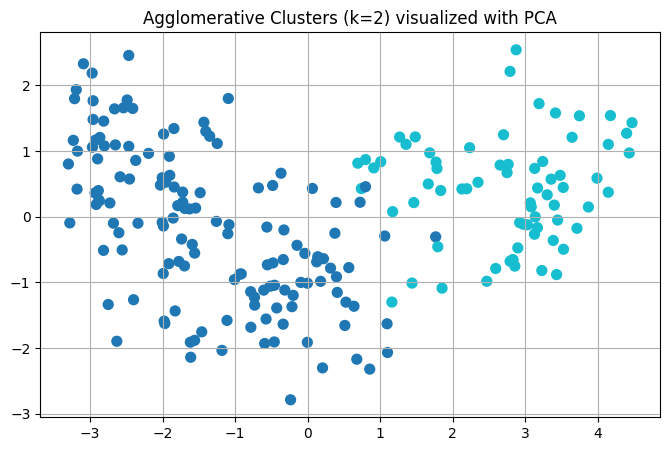

In [36]:
plt.figure(figsize=(8,5))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=agglo_label, cmap='tab10', s=50)
plt.title('Agglomerative Clusters (k=2) visualized with PCA')
plt.grid(True)
plt.show()

In [37]:
def metrics(Name, x, x_label):
    sil = silhouette_score(x, x_label)
    db = davies_bouldin_score(x, x_label)
    print(f"\n{Name} Clustering:")
    print(f" - Clusters: {len(np.unique(x_label))}")
    print(f" - Silhouette Score: {sil:.3f} (higher is better)")
    print(f" - Davies-Bouldin Index: {db:.3f} (lower is better)")

In [38]:
metrics('KMeans', x_scale, kmeans_label)
metrics('Mean Shift', x_scale, meanshift_label)
metrics('Agglomerative Clustering', x_scale, agglo_label)


KMeans Clustering:
 - Clusters: 2
 - Silhouette Score: 0.461 (higher is better)
 - Davies-Bouldin Index: 0.810 (lower is better)

Mean Shift Clustering:
 - Clusters: 2
 - Silhouette Score: 0.467 (higher is better)
 - Davies-Bouldin Index: 0.789 (lower is better)

Agglomerative Clustering Clustering:
 - Clusters: 2
 - Silhouette Score: 0.461 (higher is better)
 - Davies-Bouldin Index: 0.783 (lower is better)


In [39]:
df['Cluster'] = meanshift_label
df.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coefficient,Kernel_Groove_Length,Class_Label,Cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,0


#### Save Model

In [47]:
import joblib

joblib.dump(mean_shift, '../model/seeds.pkl')

['../model/seeds.pkl']